In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1666,2020-09-17,United Kingdom,376381.0,378219.0,41703.0,41684.0,-1838.0,19.0
1667,2020-09-17,Germany,264914.0,265857.0,9383.0,9371.0,-943.0,12.0
1668,2020-09-17,Iran,410686.0,410334.0,23678.0,23632.0,352.0,46.0
1669,2020-09-17,Turkey,295952.0,296391.0,7236.0,7249.0,-439.0,-13.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10209.663076002395
RMSE =  38237.77558255051


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  309.3818073010174
RMSE =  768.5403377494606


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  73999.93037974683
RMSE =  120615.32993723098
-- World performances for deaths --
MAE =  1797.8291139240507
RMSE =  2189.314818251985


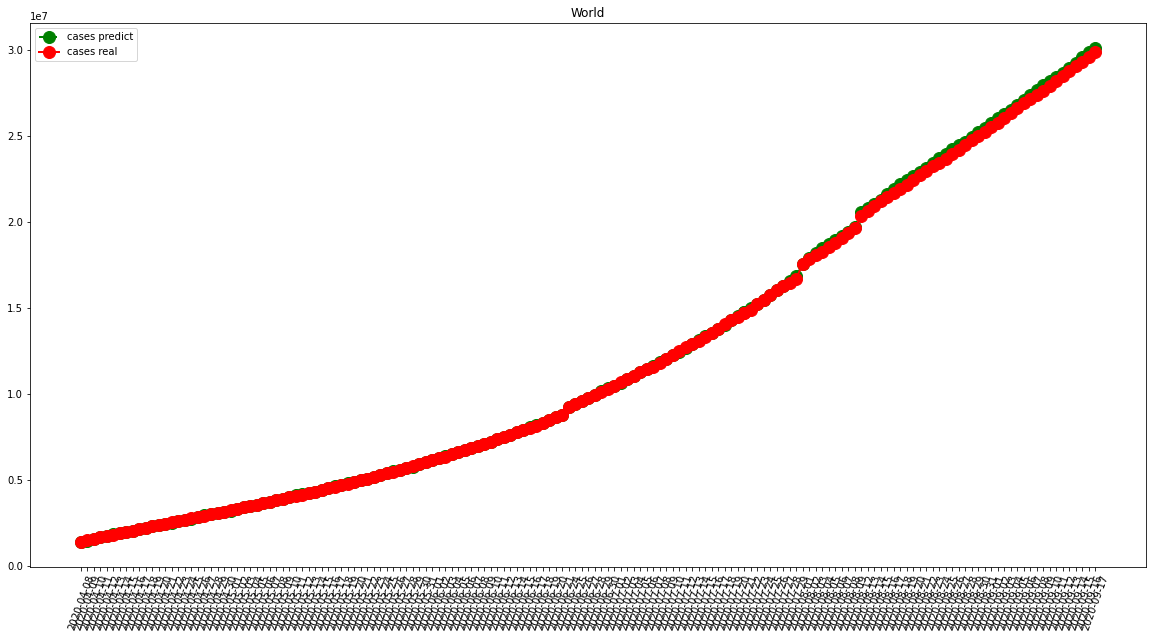

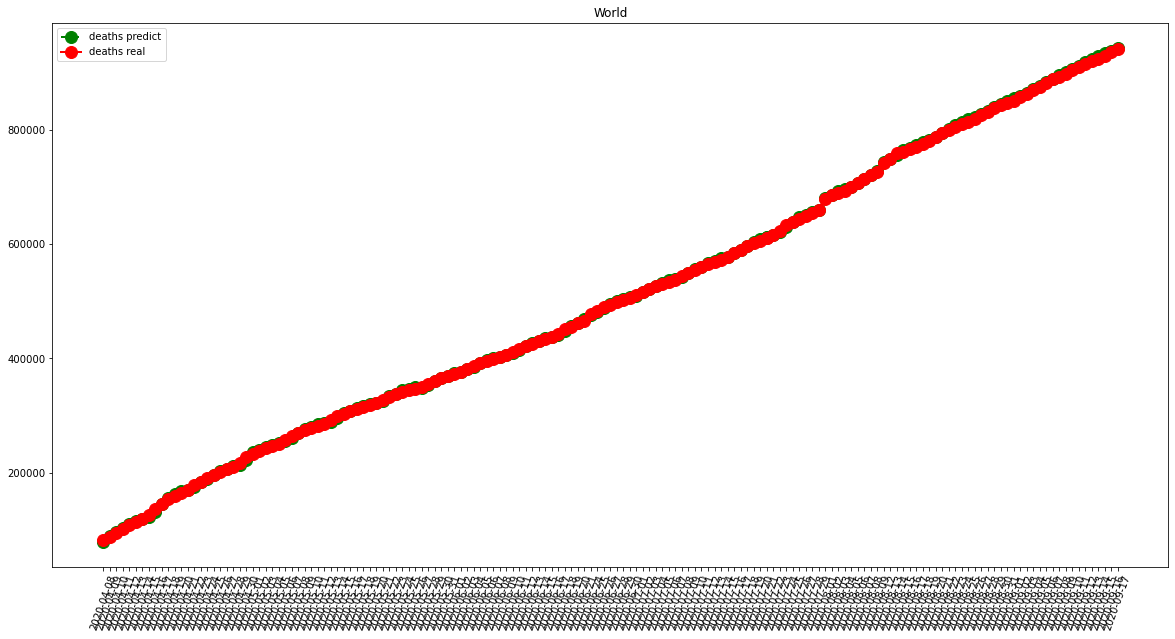

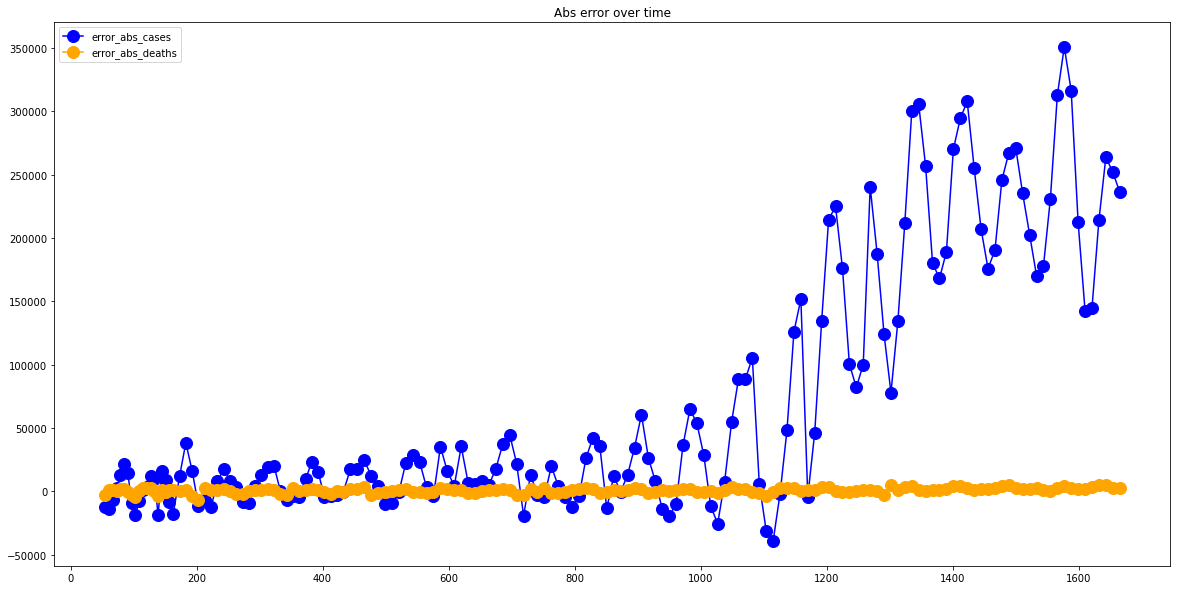

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1111.8154761904761
RMSE =  1637.9190467087892
-- France performances for deaths --
MAE =  113.125
RMSE =  258.9364580079721


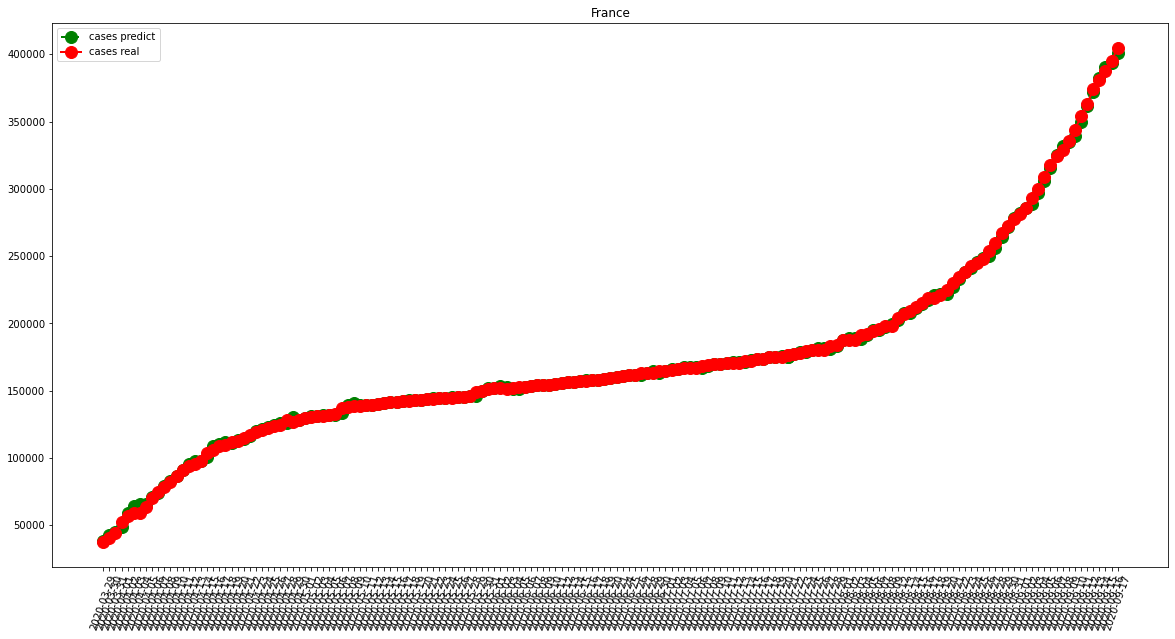

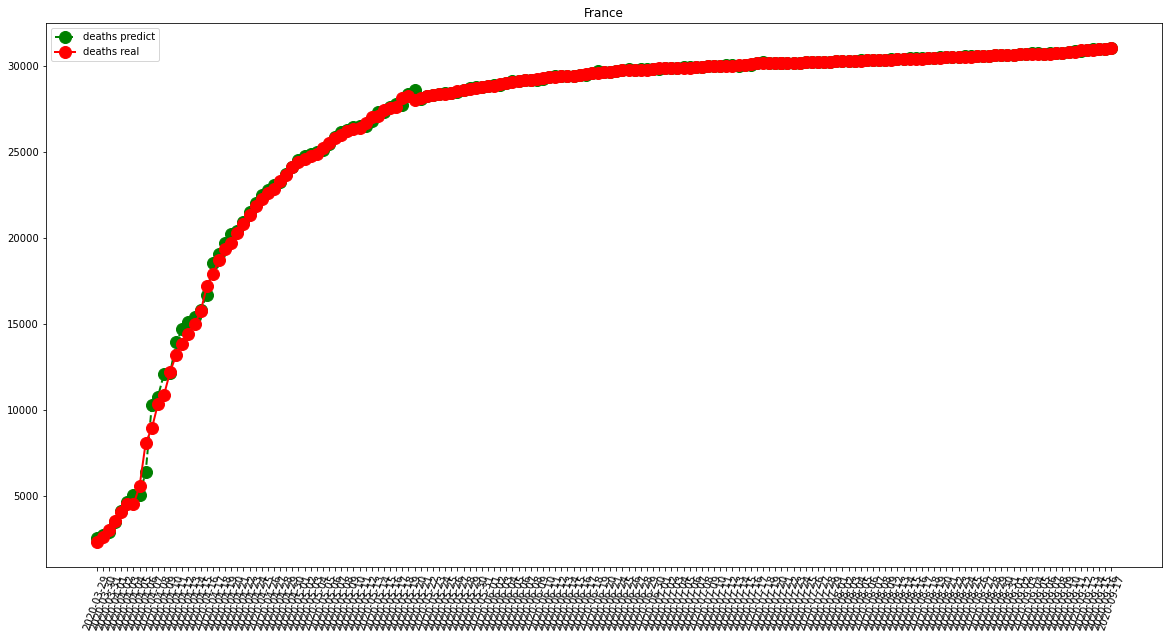

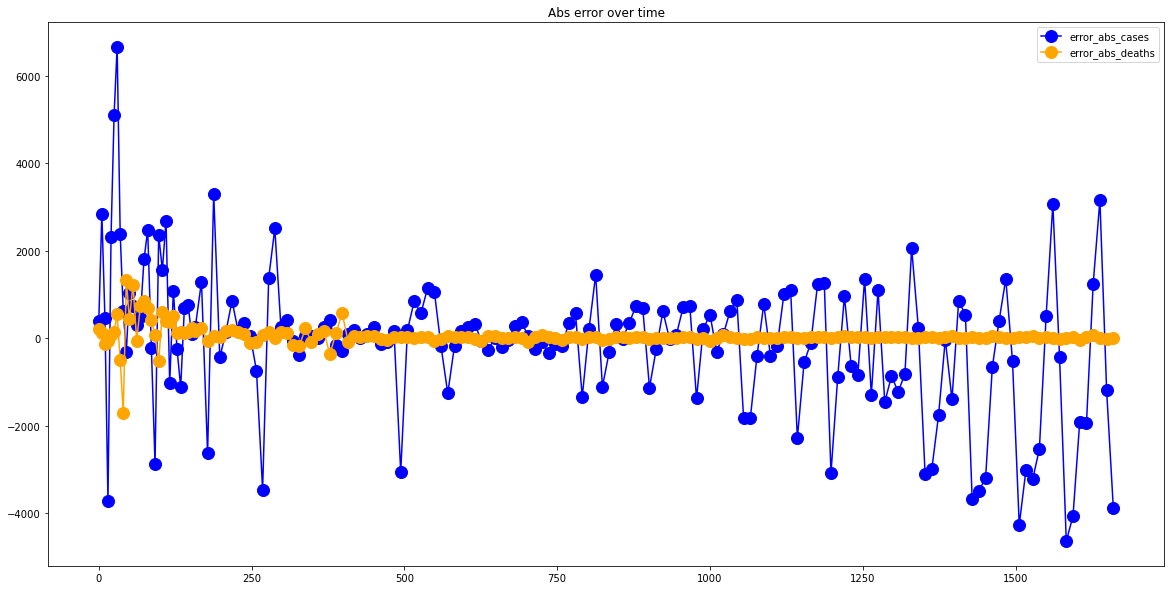

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.73809523809524
RMSE =  447.8098953584572
-- Italy performances for deaths --
MAE =  67.9702380952381
RMSE =  229.09006078915985


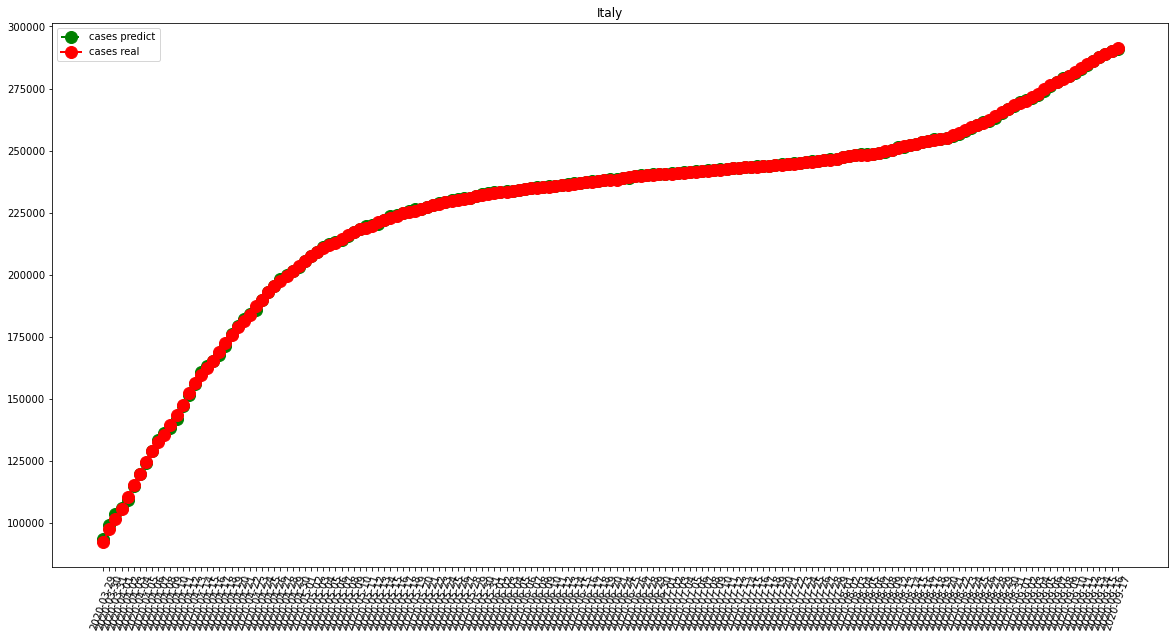

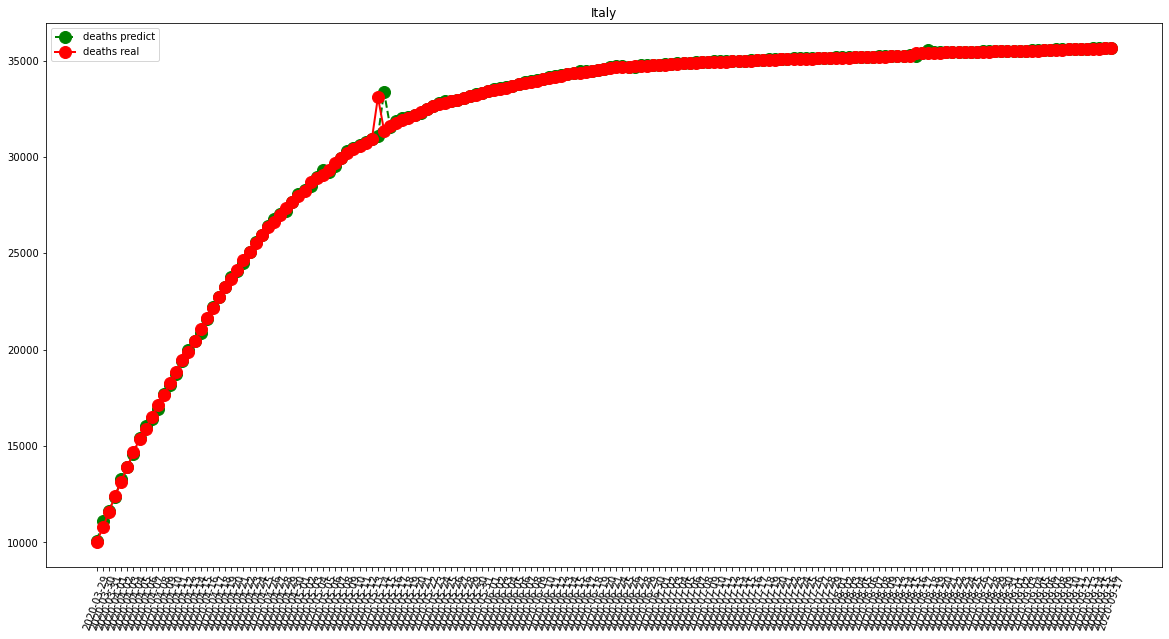

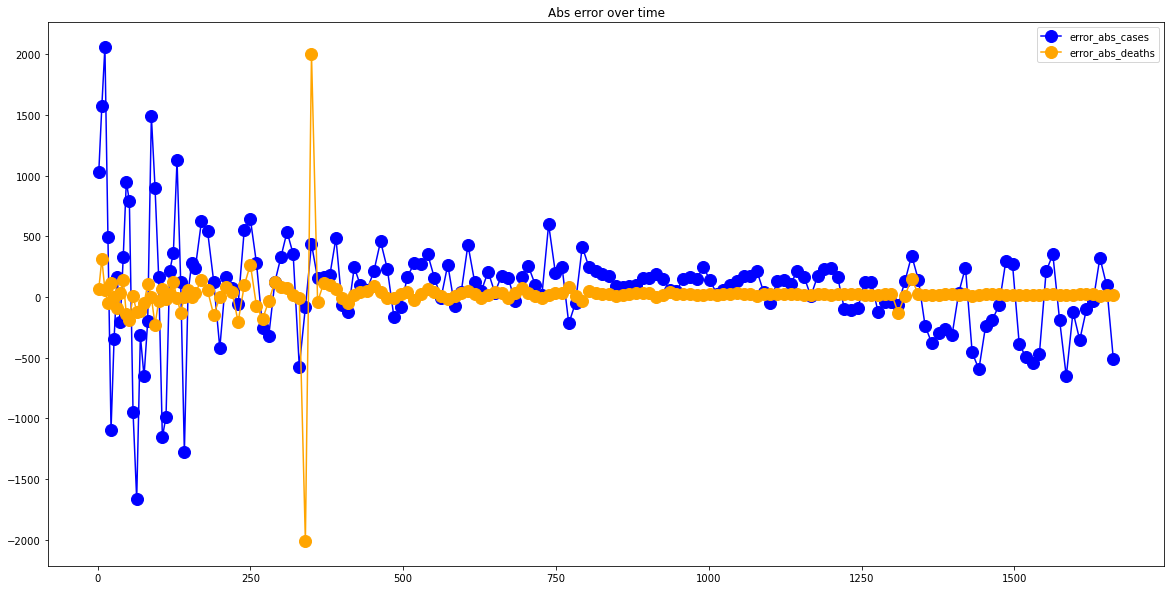

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2458.904761904762
RMSE =  4827.4136906294025
-- Spain performances for deaths --
MAE =  121.01190476190476
RMSE =  314.61247893998404


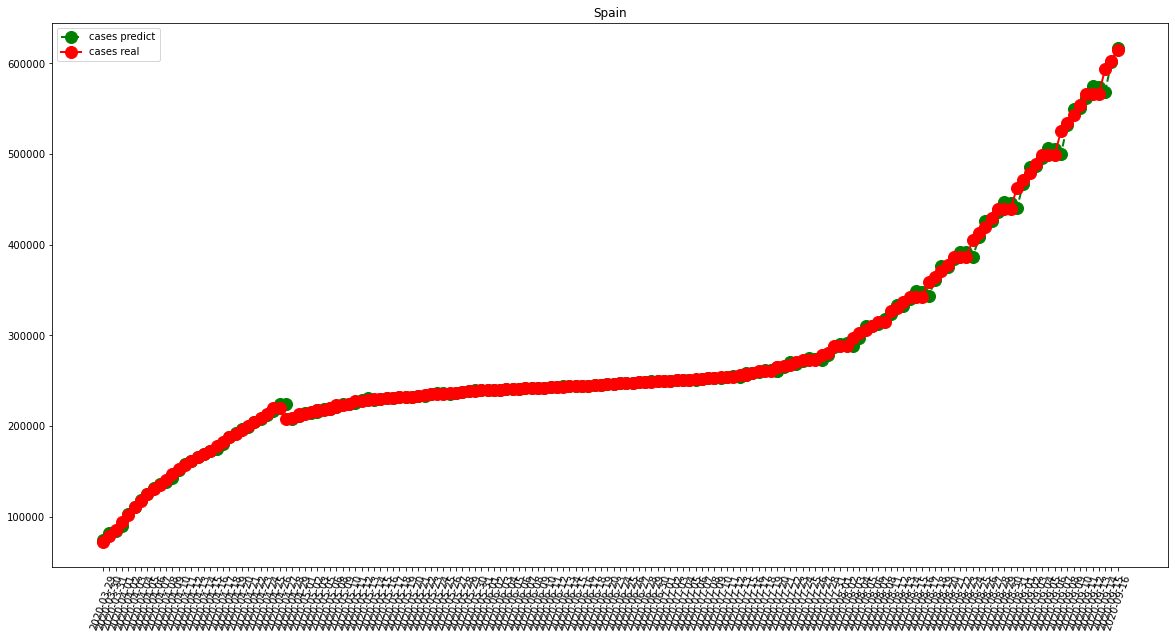

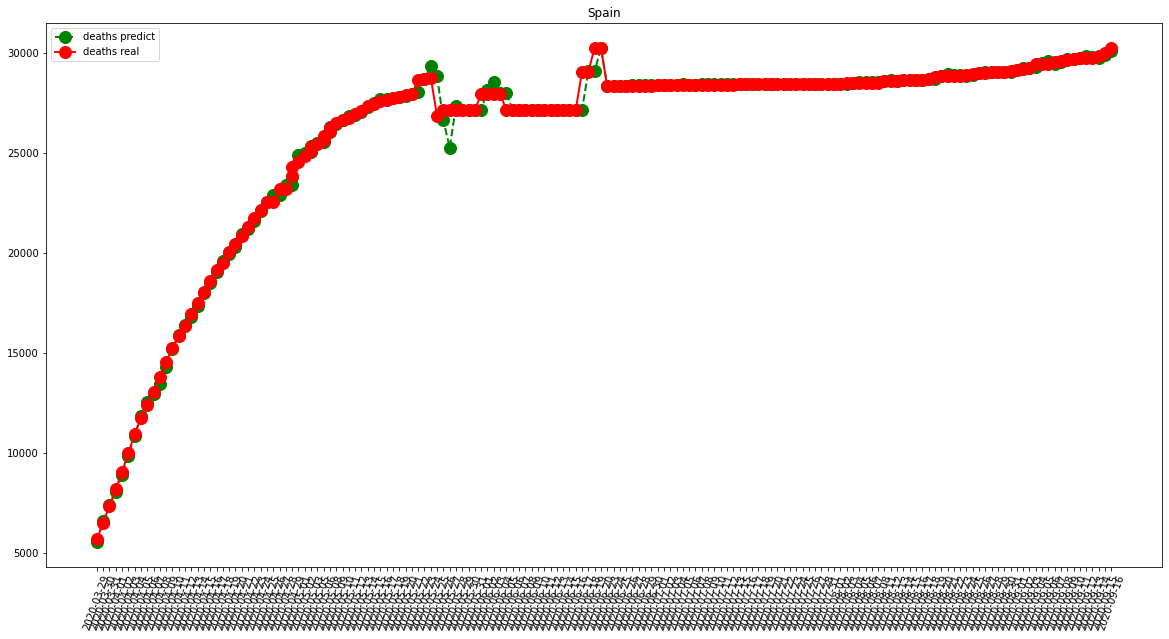

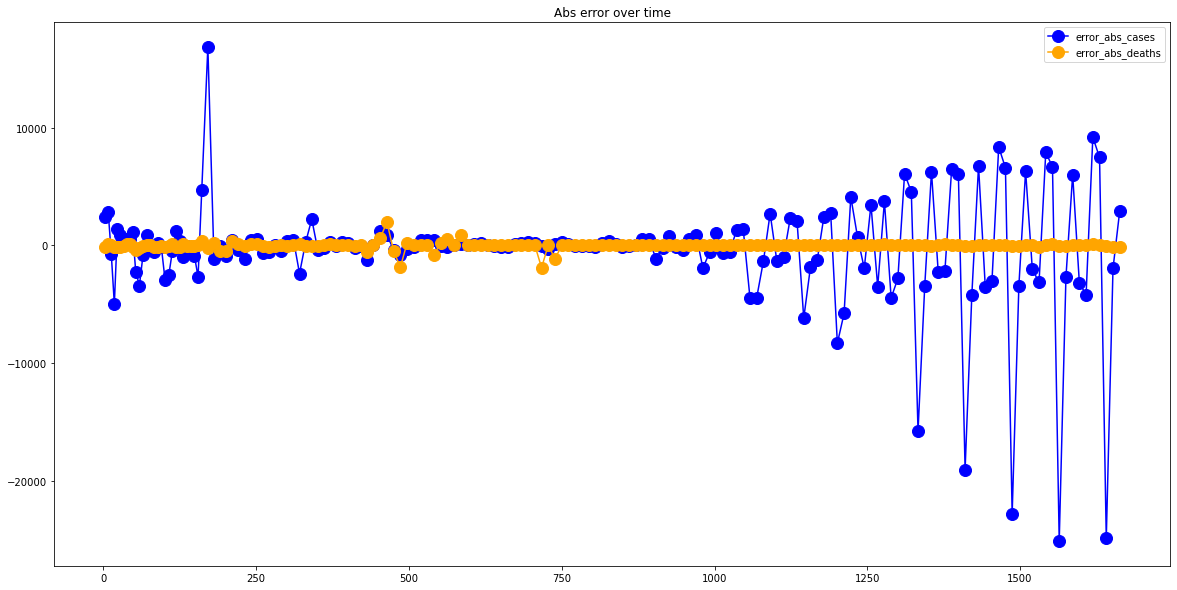

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15126.892857142857
RMSE =  22766.06646362499
-- United States performances for deaths --
MAE =  482.07142857142856
RMSE =  676.4343930457987


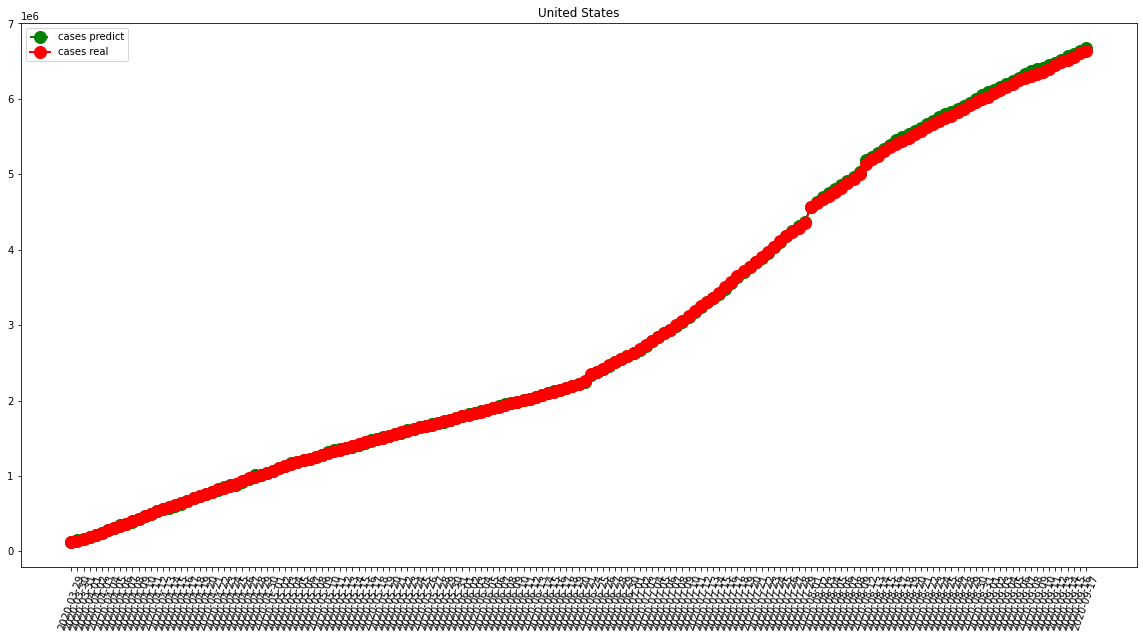

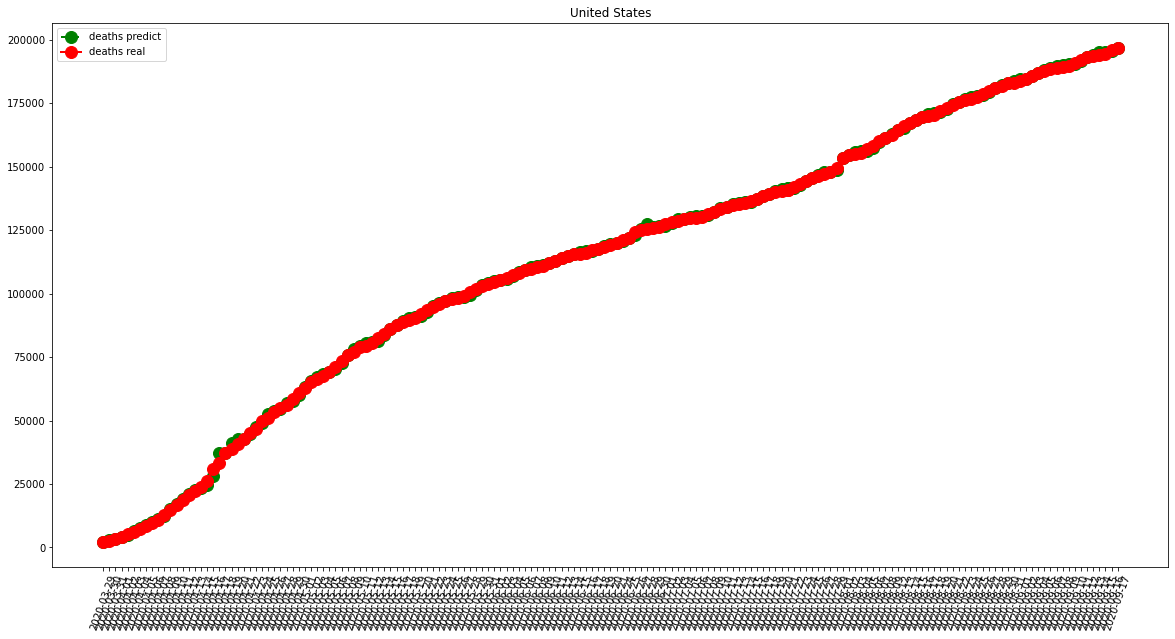

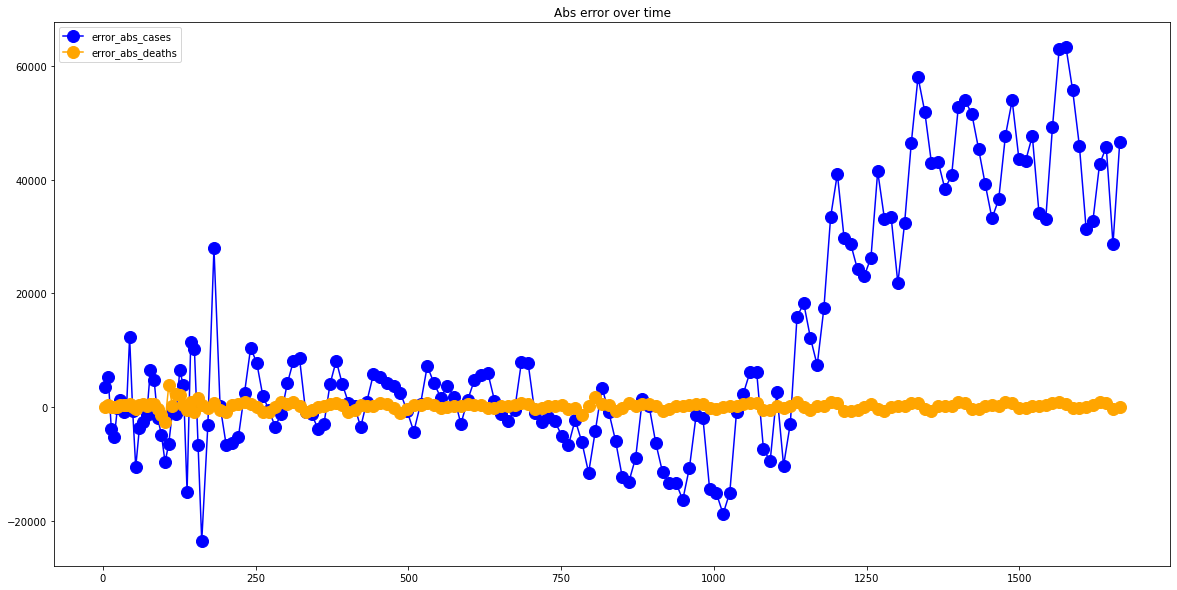

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  60.339285714285715
RMSE =  92.10485096578014
-- China performances for deaths --
MAE =  25.279761904761905
RMSE =  121.15655456592397


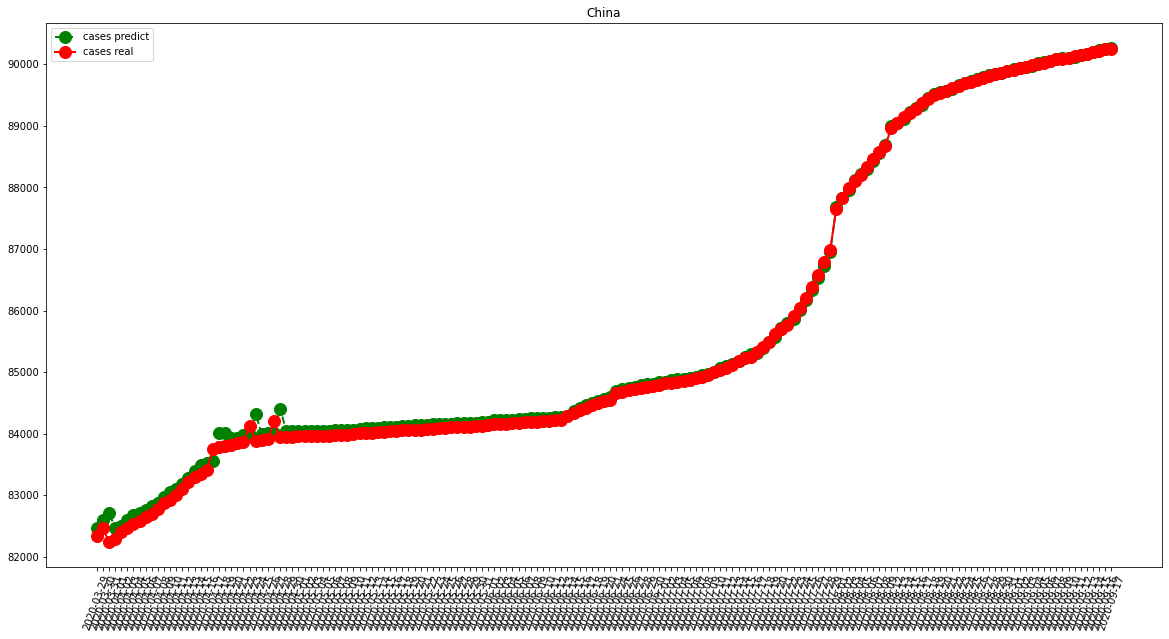

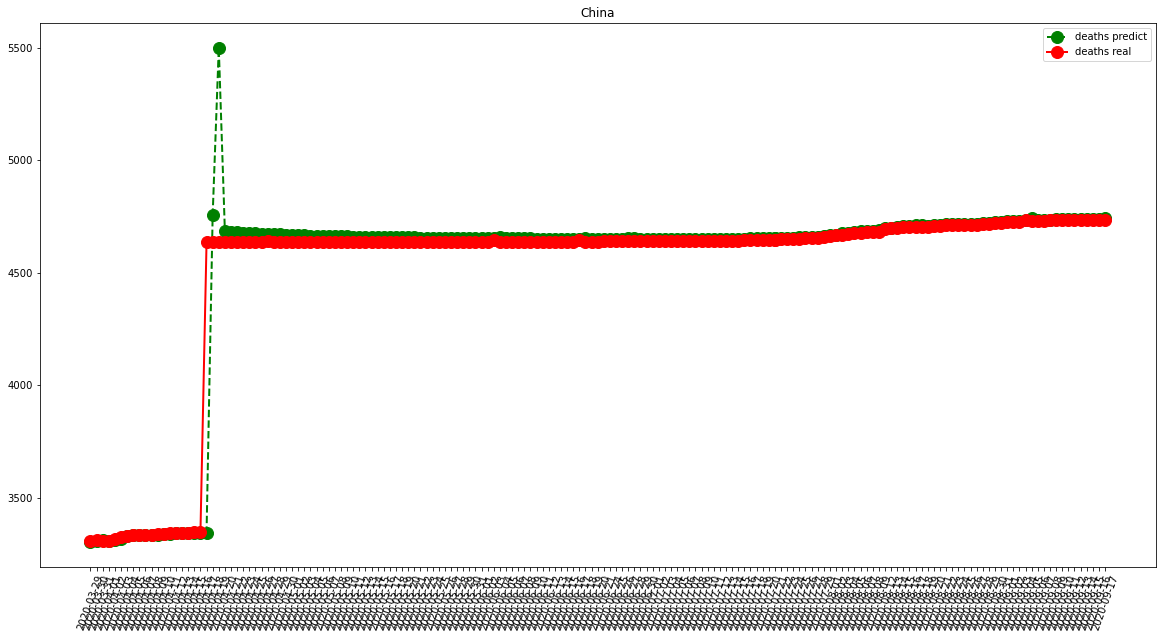

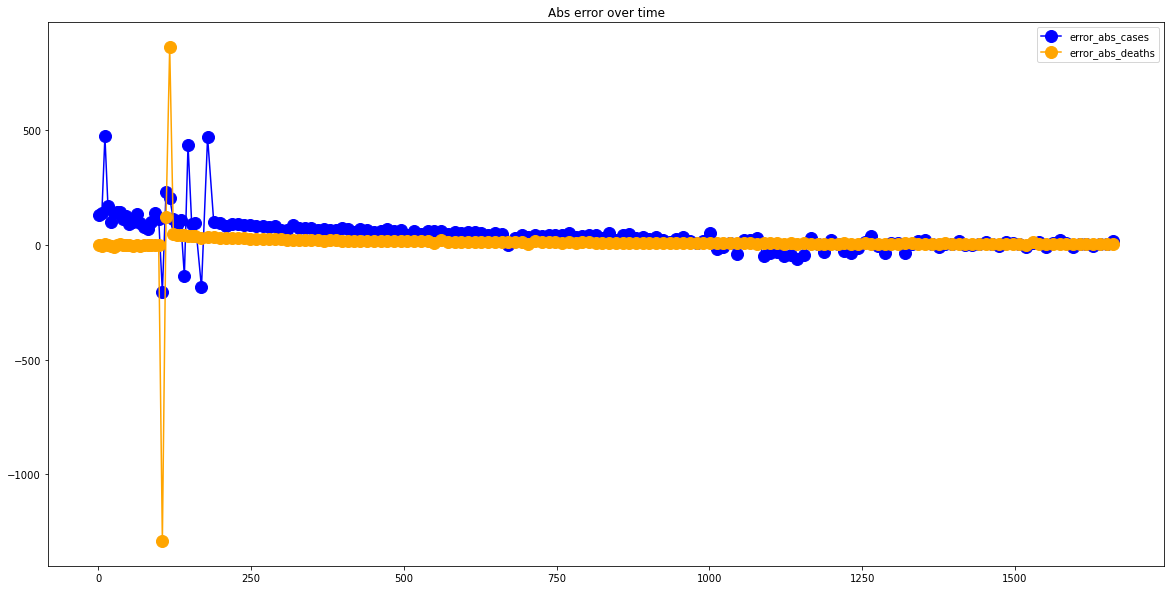

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1015.4071428571428
RMSE =  3545.9728153417727
-- United Kingdom performances for deaths --
MAE =  219.40714285714284
RMSE =  721.3440976003458


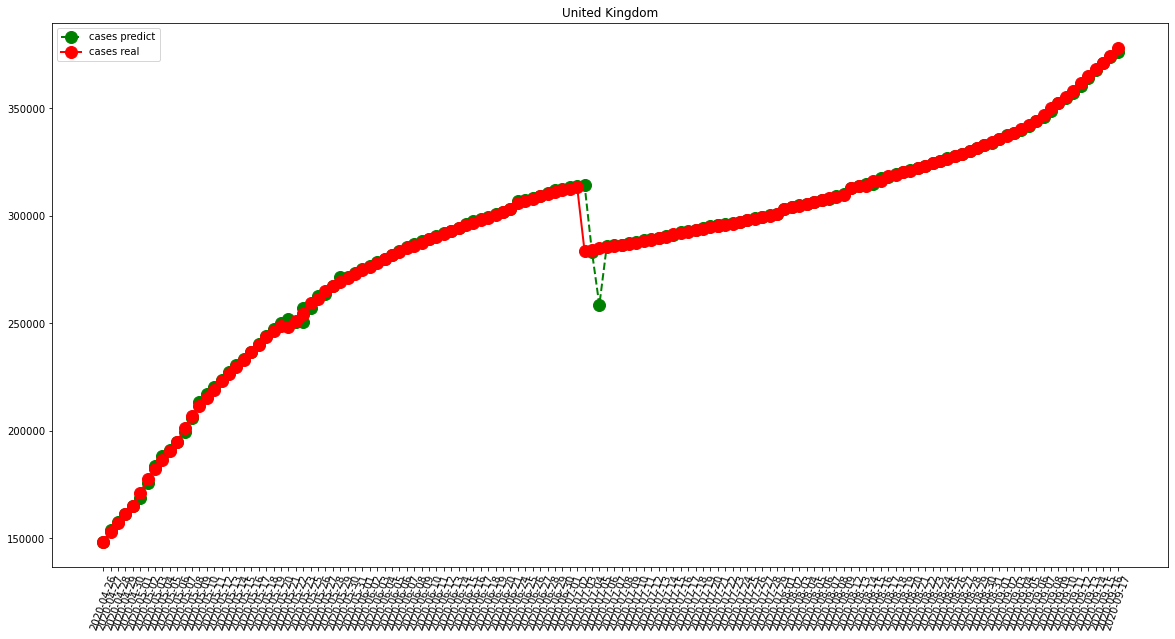

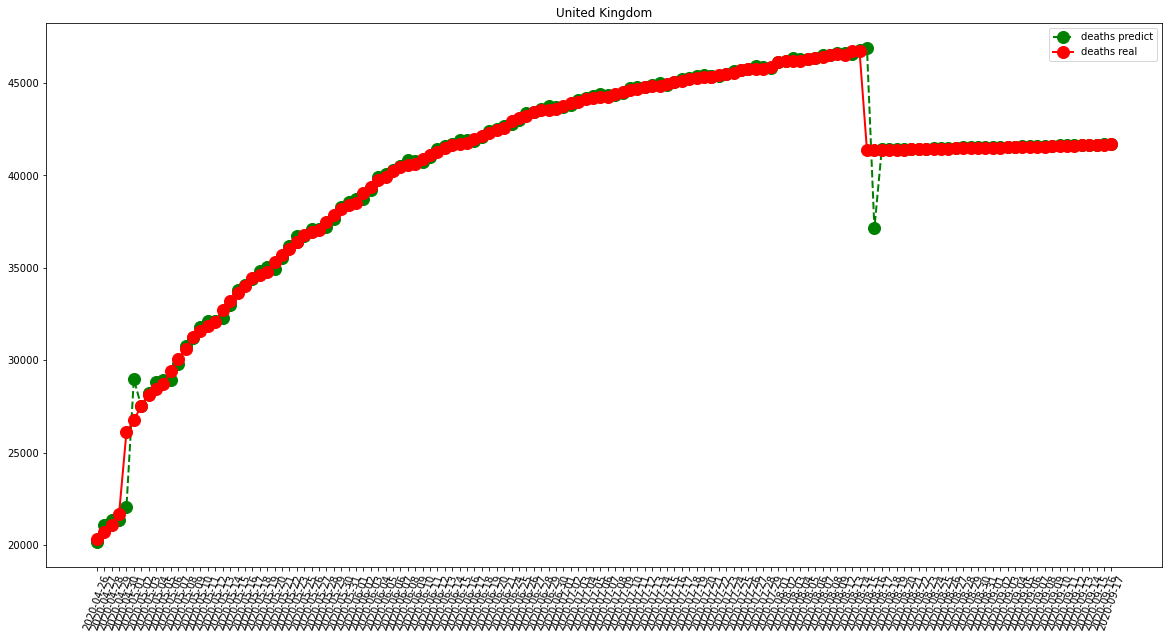

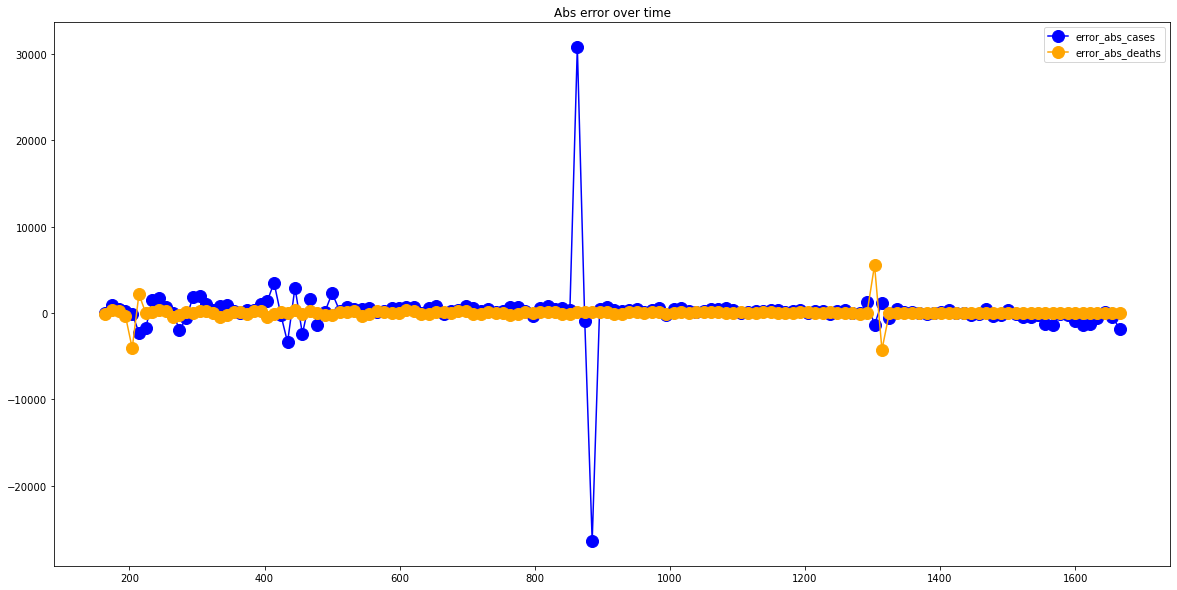

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  414.0571428571429
RMSE =  585.9071598811539
-- Germany performances for deaths --
MAE =  19.34285714285714
RMSE =  37.2318987659008


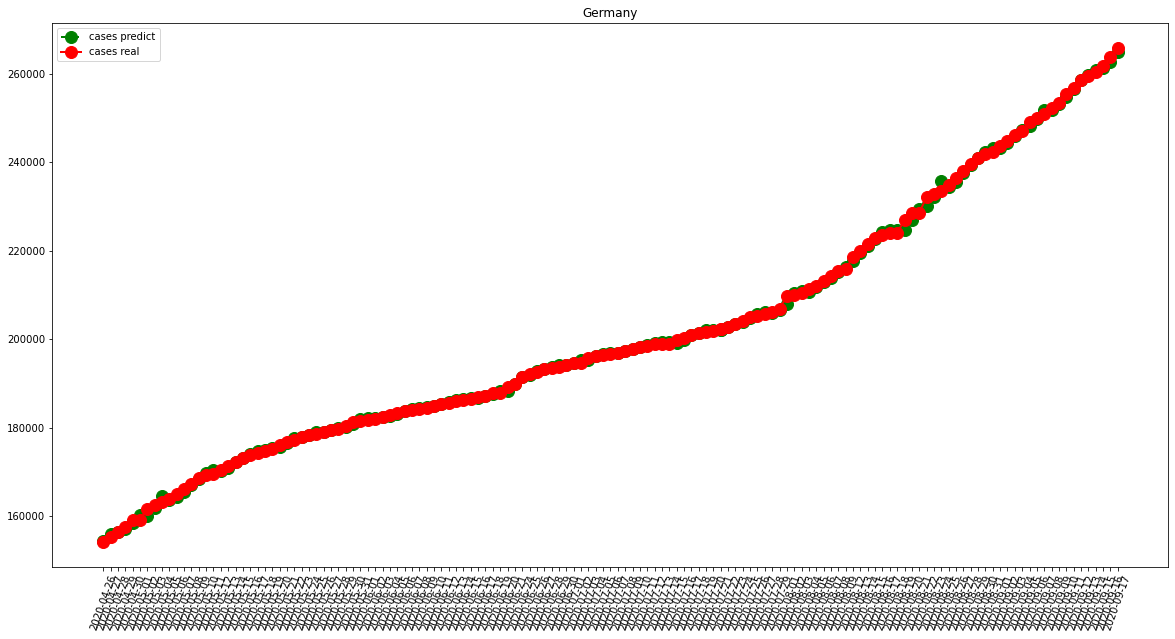

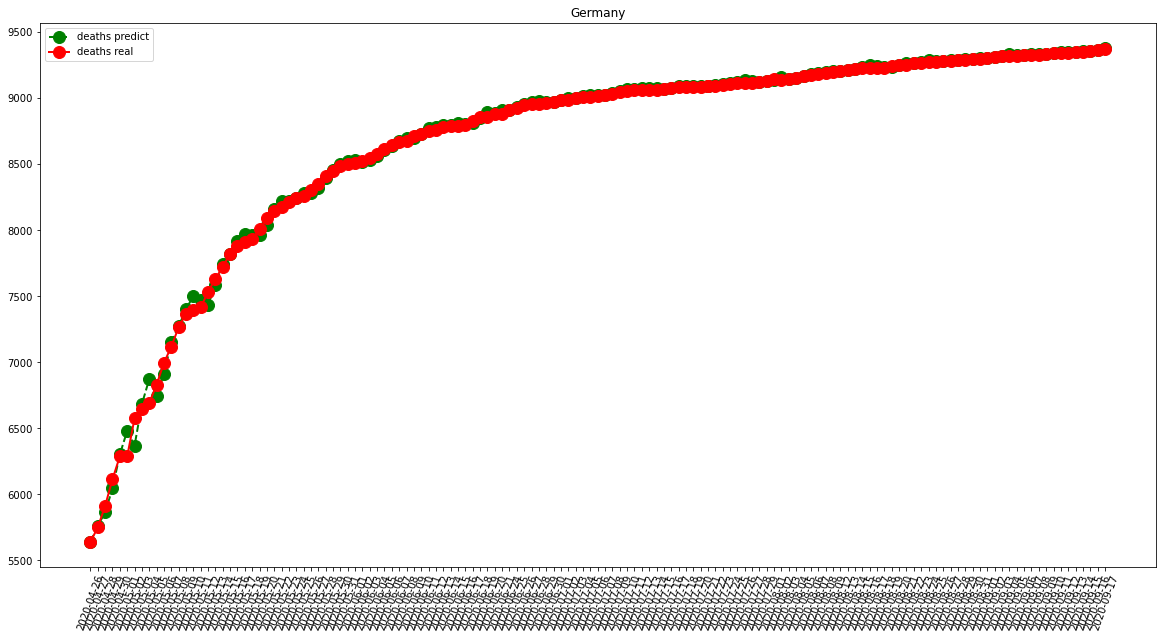

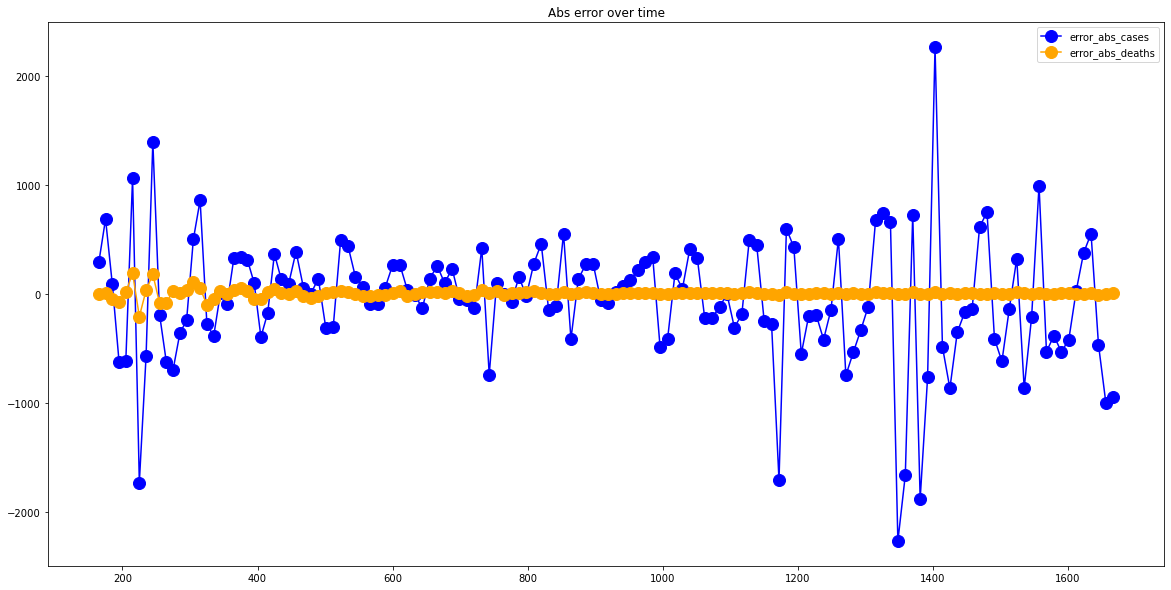

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  890.6857142857143
RMSE =  1245.891447919922
-- Iran performances for deaths --
MAE =  52.07142857142857
RMSE =  86.21667057892161


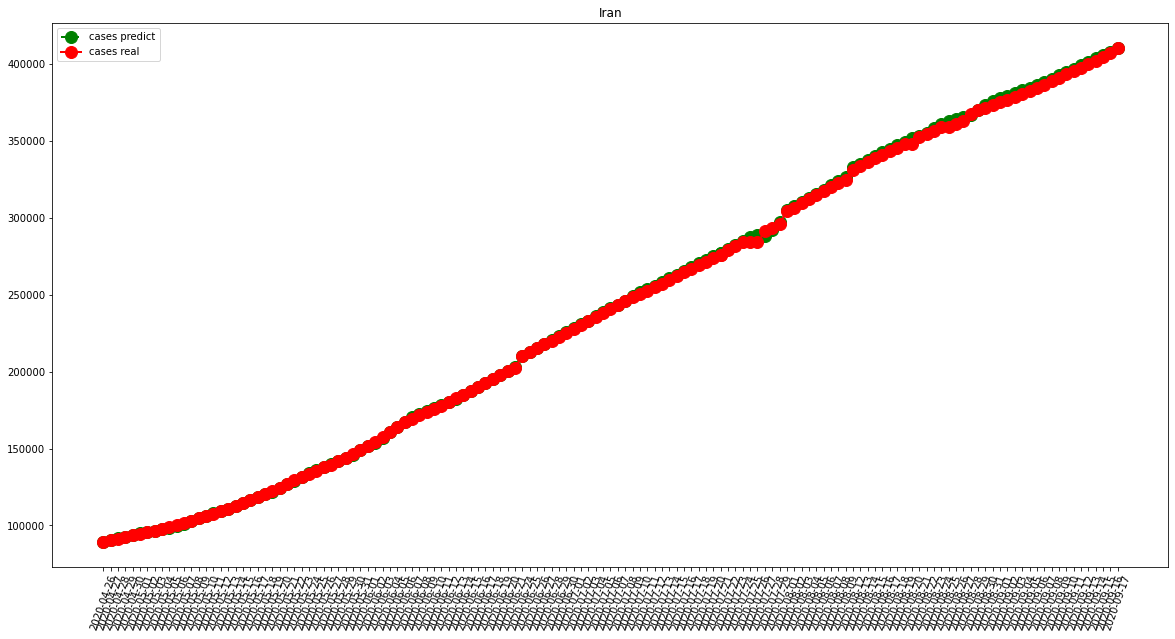

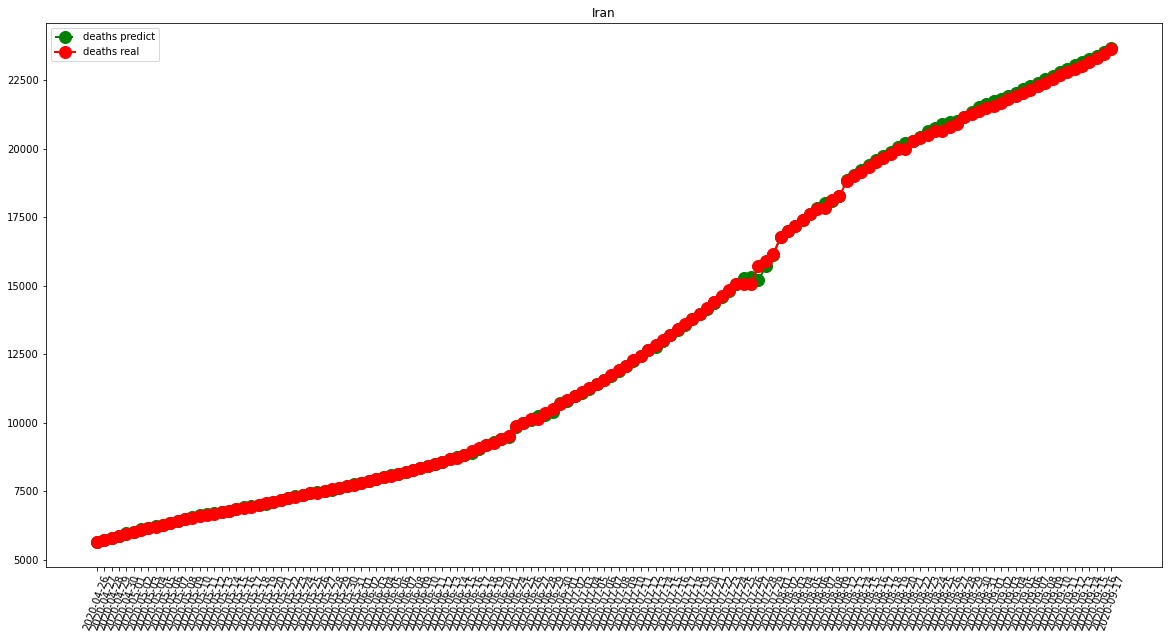

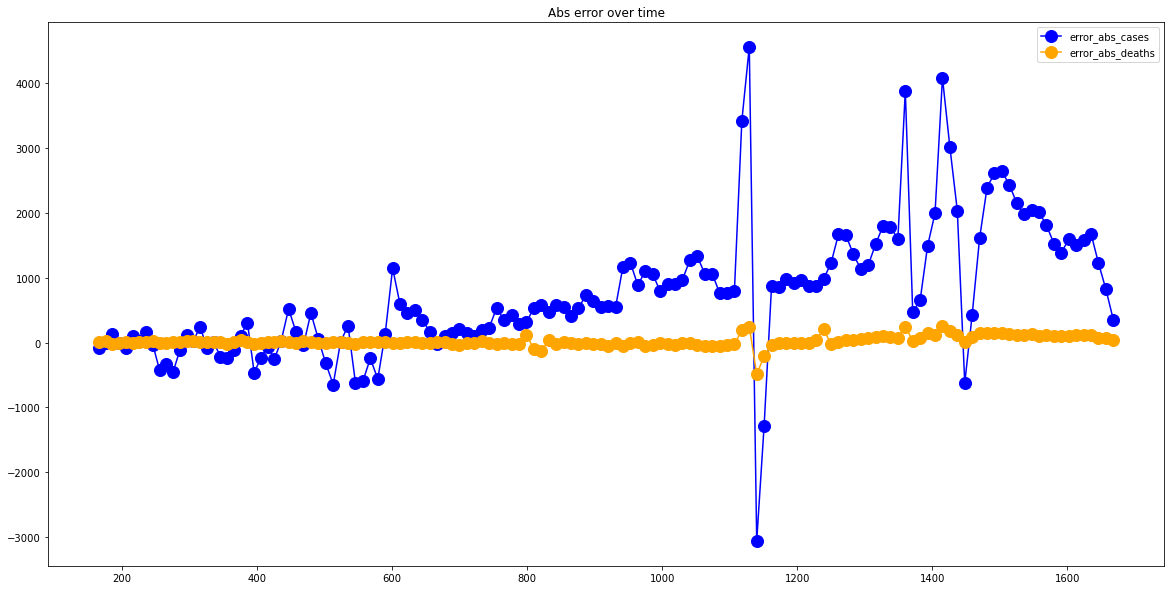

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  218.20714285714286
RMSE =  330.0164173405404
-- Turkey performances for deaths --
MAE =  15.985714285714286
RMSE =  85.98313788179634


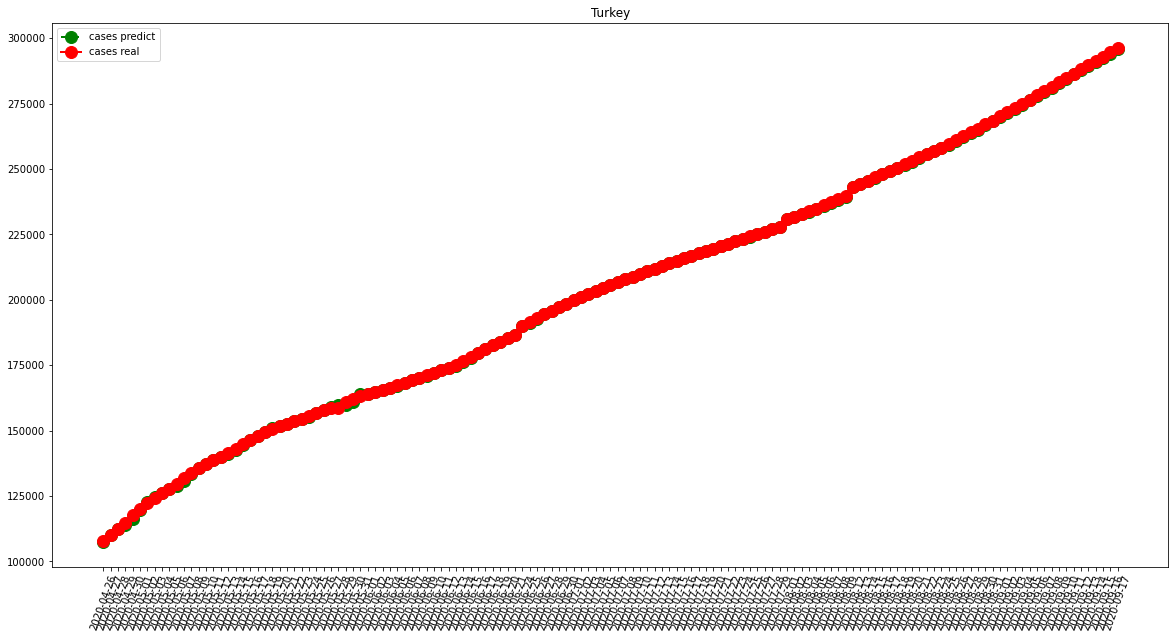

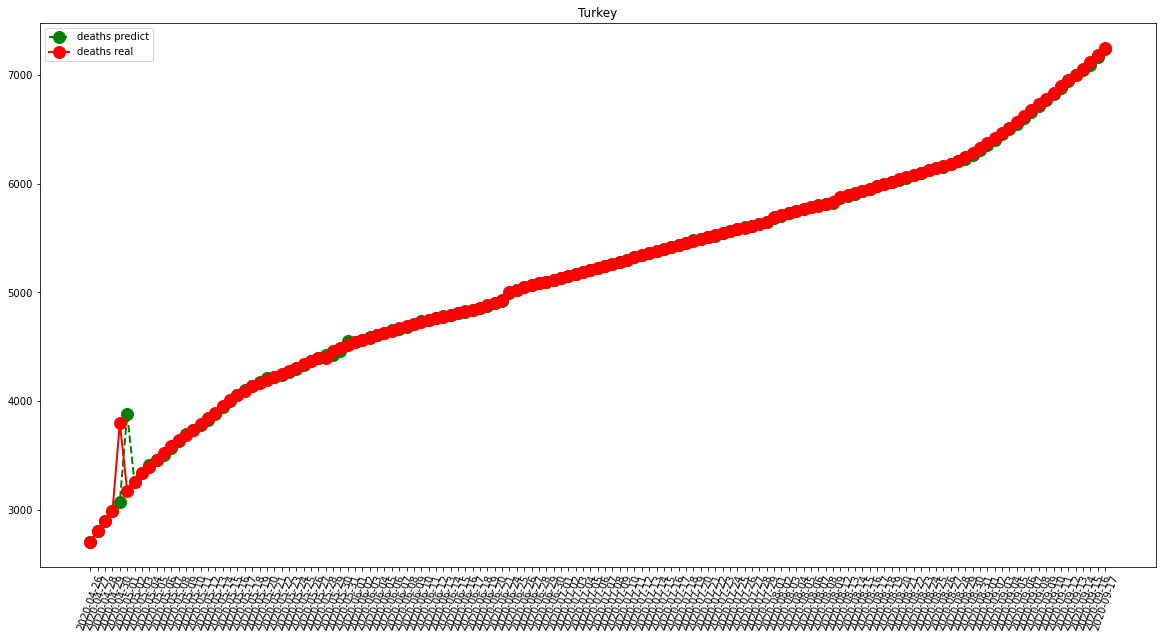

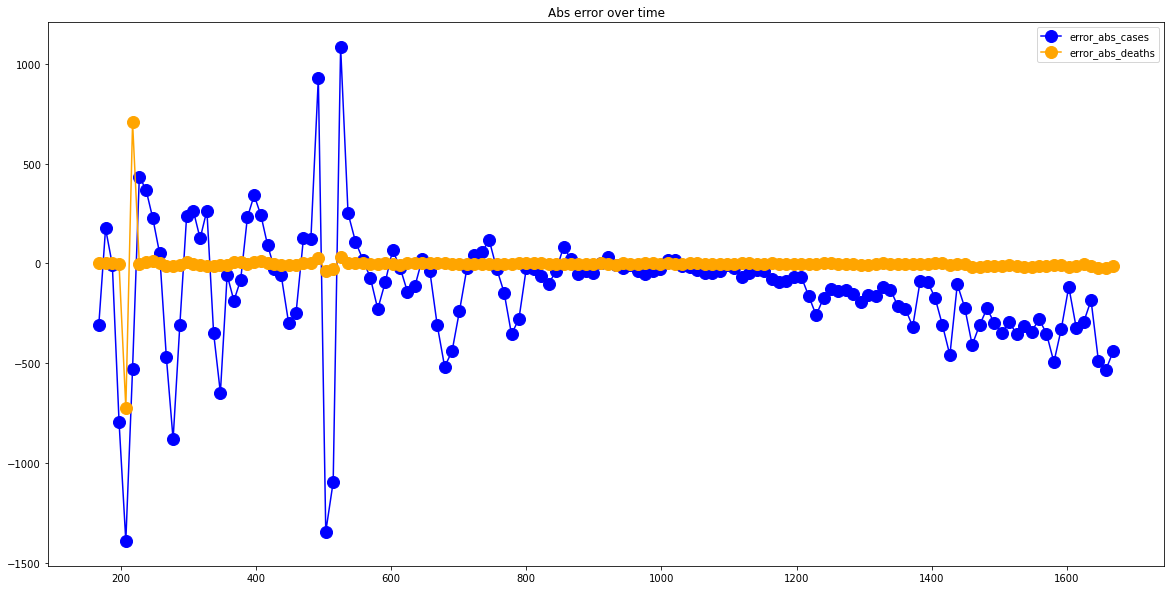

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16023.221238938053
RMSE =  21266.675741992312
-- Brazil performances for deaths --
MAE =  477.6814159292035
RMSE =  583.7772183872582


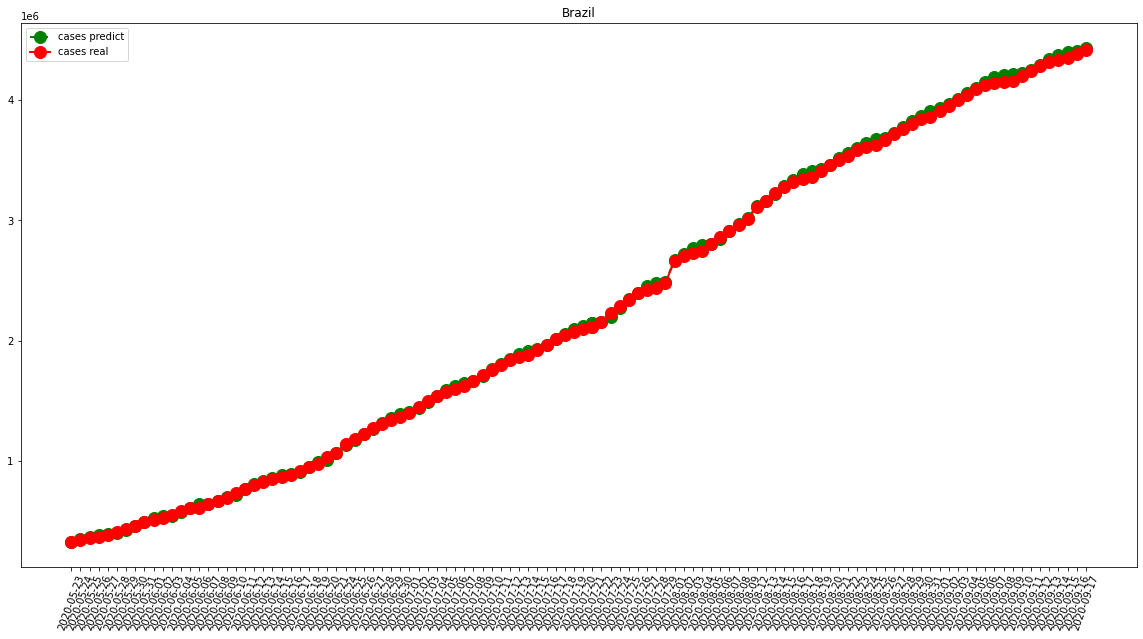

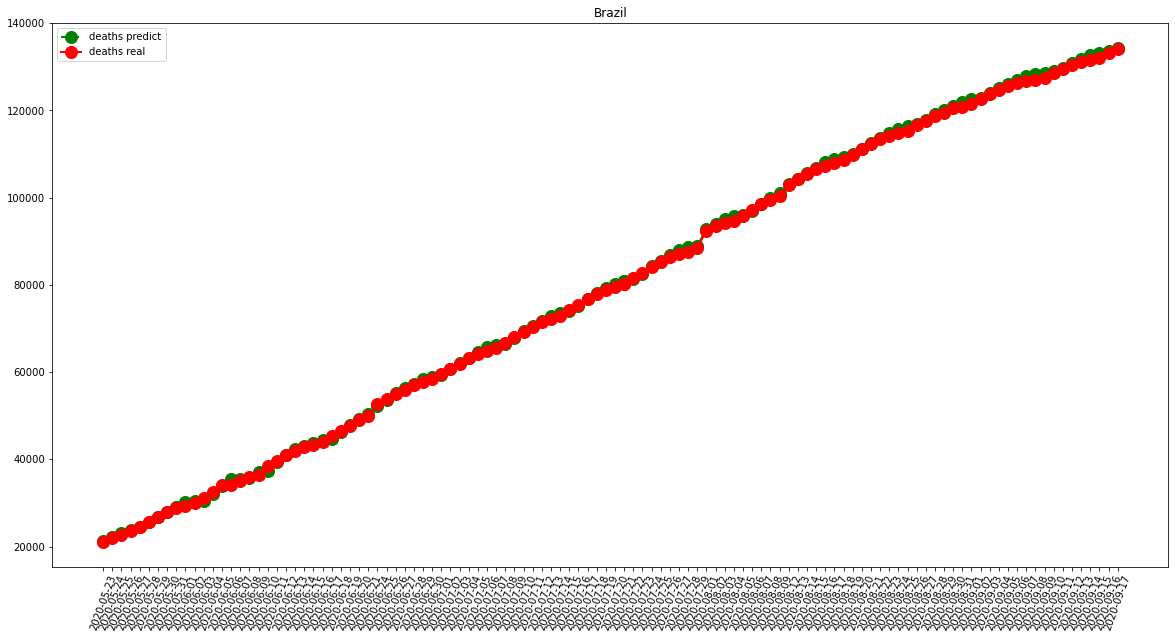

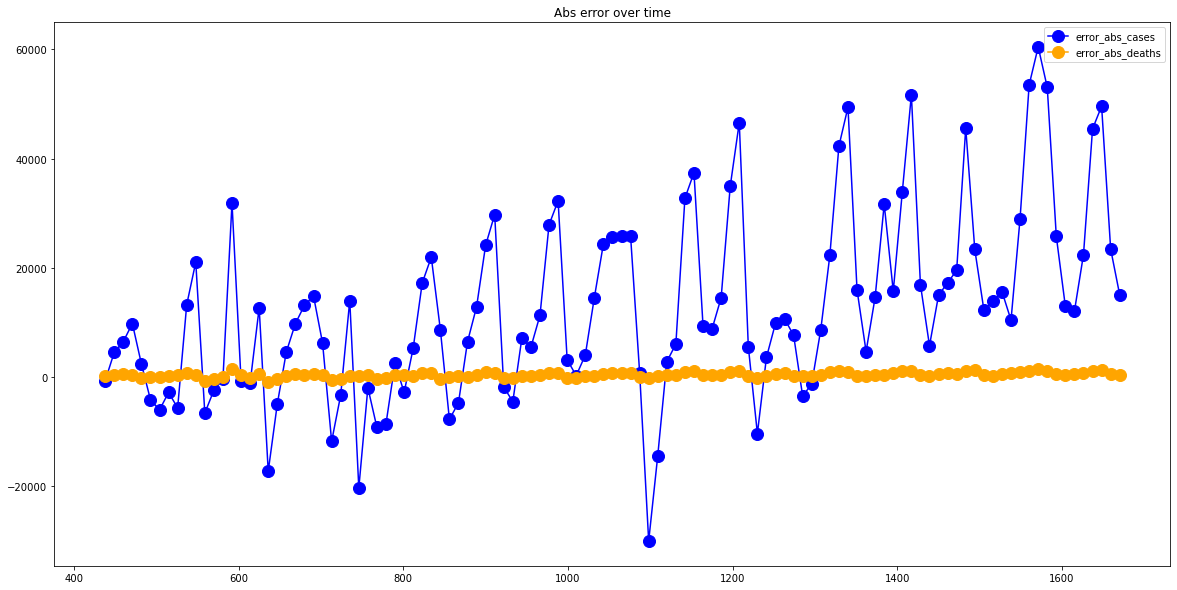

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)